In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('datasets_13720_18513_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

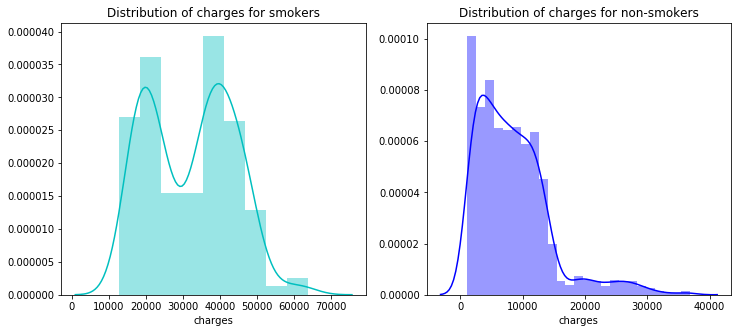

In [3]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

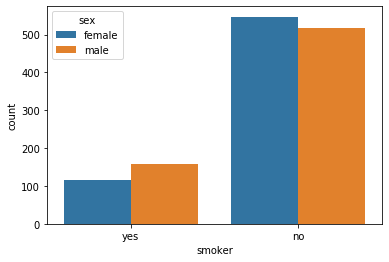

In [4]:
sns.countplot(x = 'smoker', hue = 'sex', data = data)

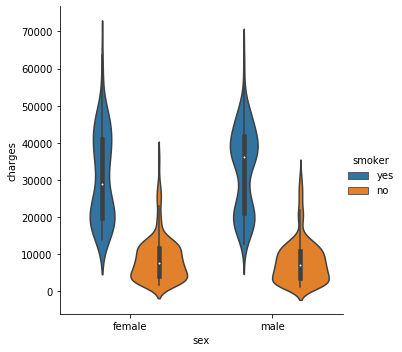

In [5]:
sns.catplot(x = 'sex',y = 'charges', hue = 'smoker', data = data, kind = 'violin')

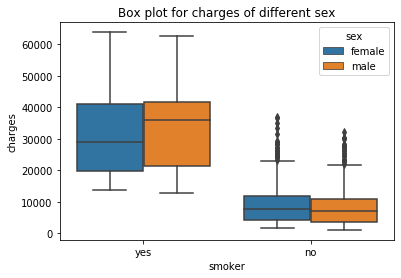

In [6]:
plt.title("Box plot for charges of different sex")
sns.boxplot(x = 'smoker', y = 'charges', hue = 'sex', data= data)

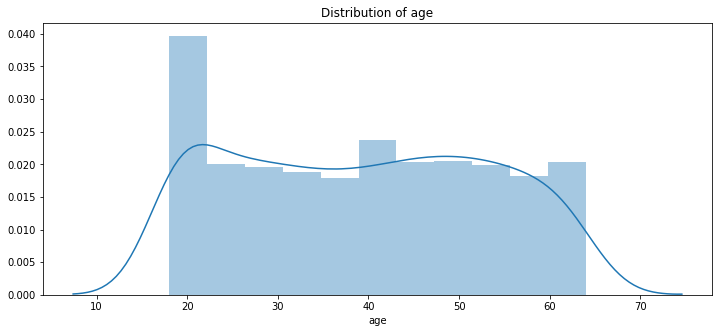

In [7]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
sns.distplot(data['age'])

In [8]:
data[data['age']==18]['smoker'].value_counts()

no     57
yes    12
Name: smoker, dtype: int64

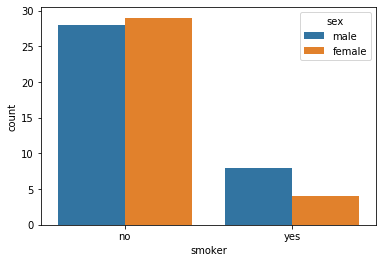

In [9]:
sns.countplot(x = 'smoker', hue = 'sex', data = data[data['age'] == 18])

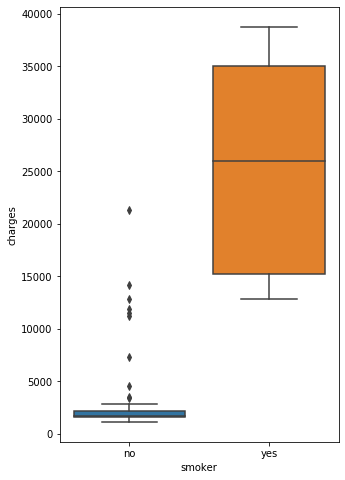

In [10]:
# Does smoking affect the cost of treatment at age 18?
plt.figure(figsize = (5, 8))
sns.boxplot(x = 'smoker', y = 'charges', data = data[data['age'] == 18])

Text(0.5, 1.0, 'Age vs Charges for Smokers')

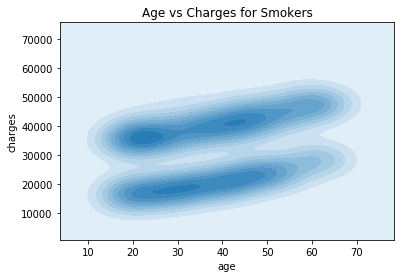

In [11]:
sns.kdeplot(data[data['smoker'] == 'yes']['age'],data[data['smoker'] == 'yes']['charges'], shade = True)
plt.title('Age vs Charges for Smokers')

Text(0.5, 1.0, 'Age vs Charges for Non-Smokers')

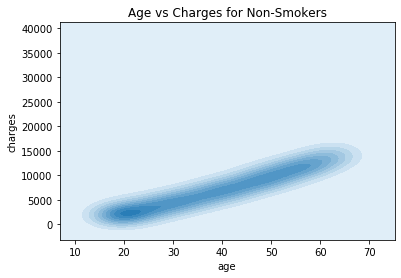

In [12]:
sns.kdeplot(data[data['smoker'] == 'no']['age'],data[data['smoker'] == 'no']['charges'], shade = True)
plt.title('Age vs Charges for Non-Smokers')

<Figure size 720x720 with 0 Axes>

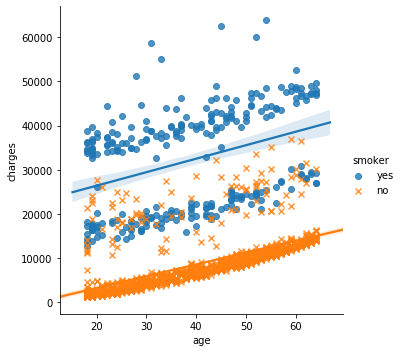

In [14]:
plt.figure(figsize=(10,10))
sns.lmplot(x = 'age', y = 'charges', hue = 'smoker', data = data, markers = ['o', 'x'])

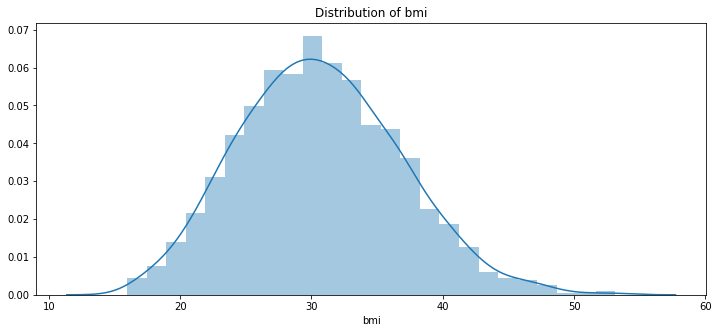

In [17]:
### bmi distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"])

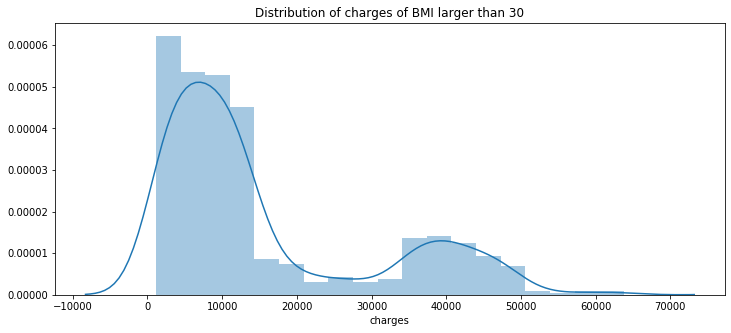

In [19]:
### bmi score of 30 is a cutoff point
plt.figure(figsize = (12, 5))
plt.title('Distribution of charges of BMI larger than 30')
sns.distplot(data[data['bmi'] >= 30]['charges'])

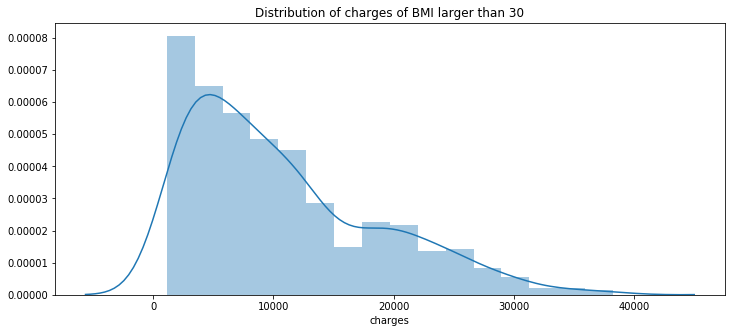

In [20]:
plt.figure(figsize = (12, 5))
plt.title('Distribution of charges of BMI smaller than 30')
sns.distplot(data[data['bmi'] < 30]['charges'])

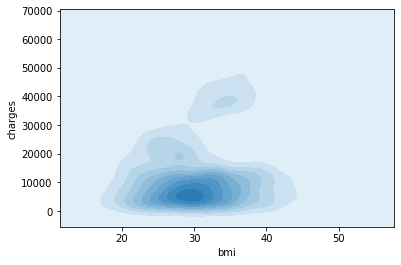

In [23]:
sns.kdeplot(data['bmi'], data['charges'], shade = True)

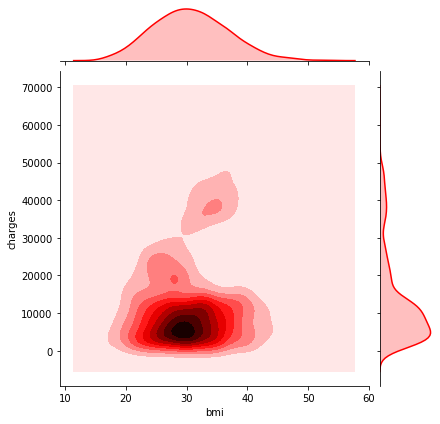

In [24]:
sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")

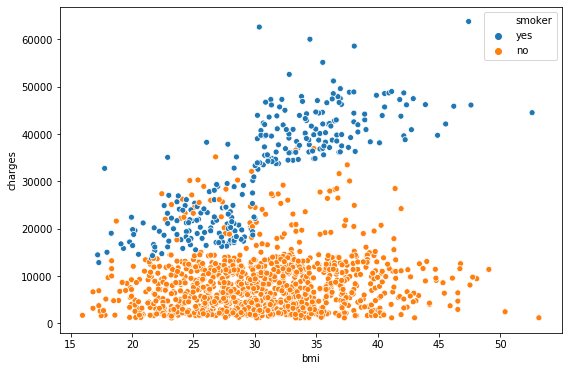

In [27]:
### bmi score vs charges smoker and non-smoker
plt.figure(figsize = (9, 6))
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data)

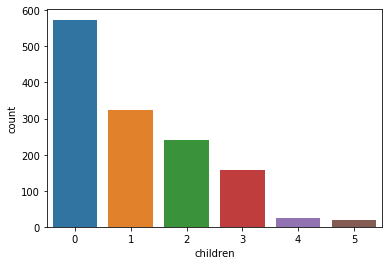

In [29]:
sns.countplot(data['children'])

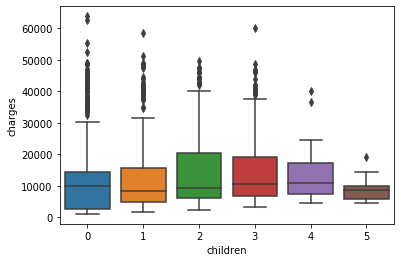

In [30]:
sns.boxplot(x = 'children', y = 'charges', data = data)

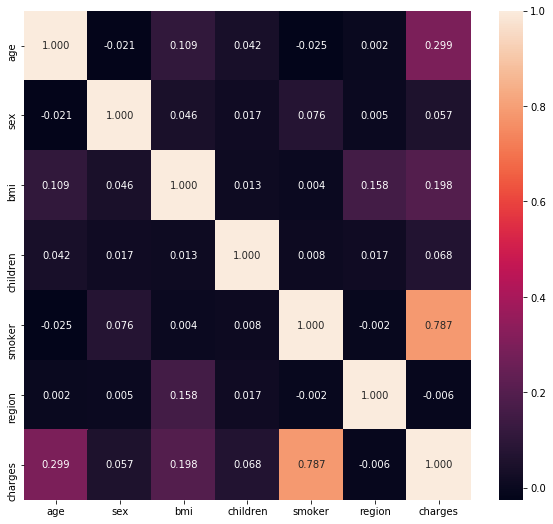

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.sex)
data['sex'] = le.transform(data['sex'])

le.fit(data.smoker) 
data.smoker = le.transform(data.smoker)

le.fit(data.region) 
data.region = le.transform(data.region)

plt.figure(figsize = (10, 9))
sns.heatmap(data.corr(),annot = True, fmt = '.3f')

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [42]:
X = data.drop(['charges'], axis = 1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('r2 train:',lr.score(X_train, y_train))
print('r2 test:',lr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))

r2 train: 0.7337162219022217
r2 test: 0.7962732059725786
32073628.56010921


In [46]:
n = list(range(2, 6))
r2_train = []
r2_test = []
mse = []
for i in range(2, 6):
    quad = PolynomialFeatures(degree = i)
    x_quad = quad.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(x_quad,y, random_state = 0)
    
    plr = LinearRegression()
    plr.fit(X_train, y_train)
    
    y_pred = plr.predict(X_test)
    r2_train.append(plr.score(X_train, y_train))
    r2_test.append(plr.score(X_test,y_test))
    mse.append(mean_squared_error(y_test, y_pred))
result = pd.DataFrame(np.column_stack([n, r2_train, r2_test, mse]), 
                               columns=['Degree', 'train Rsquared', 'test Rsquared', 'Mse'])
result

,Degree,train Rsquared,test Rsquared,Mse
0,2.0,0.831481,0.884628,1.816348e+07
1,3.0,0.841715,0.879056,1.904082e+07
2,4.0,0.856473,0.857891,2.237286e+07
3,5.0,0.884269,0.781857,3.434326e+07


In [65]:
X = data.drop(['charges'], axis = 1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [73]:
rf = RandomForestRegressor(oob_score = True, random_state = 1, criterion= 'mse')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8707069513939738
20355188.114508193


In [61]:
#print(rf.oob_score_)

AttributeError: 'RandomForestRegressor' object has no attribute 'oob_score_'

Feature ranking:
1. feature 4 (0.603241)
2. feature 2 (0.213779)
3. feature 0 (0.138449)
4. feature 3 (0.021509)
5. feature 5 (0.016149)
6. feature 1 (0.006872)


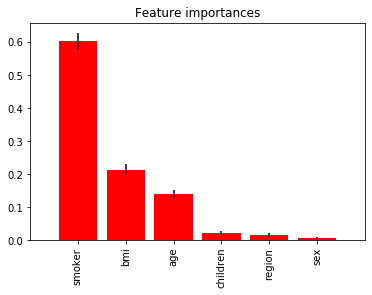

In [51]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")

plt.xticks(range(X_train.shape[1]), X.columns[indices],rotation=90)

plt.xlim([-1, X.shape[1]])
plt.show()